# Optical Identification of GRBs Using Machine Learning Techniques on Simulated Data 

In [26]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_parquet('../vtacML/data/combined_qpo_vt_all_cases_with_GRB_with_flags.parquet', engine='fastparquet')
# df.to_csv(path_or_buf='data/combined_qpo_vt_all_cases_with_GRB_with_flags.csv')

In [6]:
def handle_nans( X, y=None):
    X_ = X.copy()
    for column in X.columns:
        if X[column].isna().sum():
            # Create the isna column
            new_column_name = f'{column}_isnan'
            X_[new_column_name] = X_[column].isna().astype(int)
            # Impute missing values with the mean 
            impute_value = X_[column].median()
            X_[column].fillna(impute_value, inplace=True)
    return X_

In [32]:
cols =['MAGCAL_R0',   
       'MAGCAL_R1',
       'MAGCAL_R2',
       'MAGCAL_R3',
       'MAGCAL_B0',
       'MAGCAL_B1',
       'MAGCAL_B2',
       'MAGCAL_B3',
       'MAGERR_R0',
       'MAGERR_R1',
       'MAGERR_R2',
       'MAGERR_R3',
       'MAGERR_B0',
       'MAGERR_B1',
       'MAGERR_B2',
       'MAGERR_B3',
       'MAGVAR_R1',
       'MAGVAR_R2',
       'MAGVAR_R3',
       'MAGVAR_B1',
       'MAGVAR_B2',   
       'MAGVAR_B3']
clean_df = handle_nans(df)


In [56]:
%%time
tsne = TSNE(n_components=2,perplexity=50, random_state=42)
X = clean_df[cols]
X_tsne = tsne.fit_transform(X.loc[:50000][:])


CPU times: user 13min 39s, sys: 1min 53s, total: 15min 32s
Wall time: 1min 47s


In [89]:
x = pd.Series([x[0] for x in X_tsne])
y = pd.Series([x[1] for x in X_tsne])

In [95]:
target = clean_df['IS_GRB'][:50001]
target_mask = (target==0)
x_not_GRB = x[target_mask]
y_not_GRB = y[target_mask]

x_GRB = x[target_mask==False]
y_GRB = y[target_mask==False]



(173, 49828)

<Axes: >

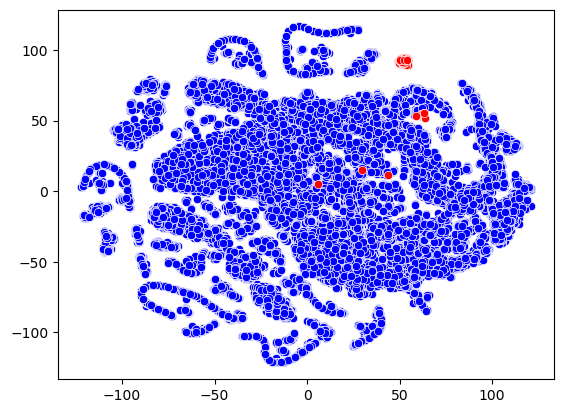

In [98]:
sns.scatterplot(x=x_not_GRB, y=y_not_GRB, color='b')
sns.scatterplot(x=x_GRB, y=y_GRB, color='r')


In [11]:
clean_df[cols].isna().any()

MAGCAL_R0    False
MAGCAL_R1    False
MAGCAL_R2    False
MAGCAL_R3    False
MAGCAL_B0    False
MAGCAL_B1    False
MAGCAL_B2    False
MAGCAL_B3    False
MAGERR_R0    False
MAGERR_R1    False
MAGERR_R2    False
MAGERR_R3    False
MAGERR_B0    False
MAGERR_B1    False
MAGERR_B2    False
MAGERR_B3    False
MAGVAR_R1    False
MAGVAR_R2    False
MAGVAR_R3    False
MAGVAR_B1    False
MAGVAR_B2    False
MAGVAR_B3    False
dtype: bool

<Axes: ylabel='Frequency'>

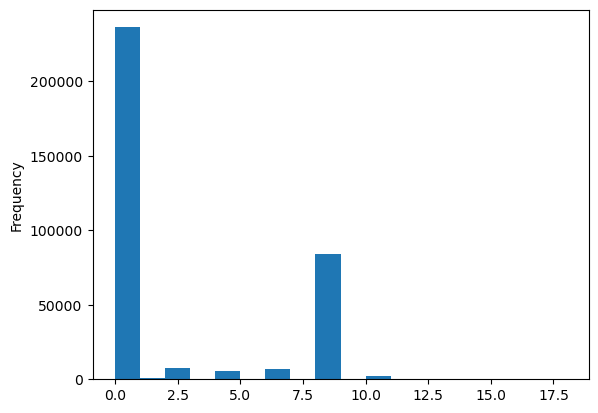

In [66]:
df['EFLAG_B0'].plot(kind='hist', bins=np.max(df['EFLAG_B0']))

In [91]:
import yaml
config_path = 'VTAC_ML_Classifier/config/config.yaml'
with open(config_path, 'r') as f:
            config = yaml.safe_load(f)

In [98]:
dict = {}

for model in config['Models']:
    dict[model] = config['Models'][model]['class']

dict

rfc
RandomForestClassifier()
ada
AdaBoostClassifier()


{'rfc': 'RandomForestClassifier()', 'ada': 'AdaBoostClassifier()'}

0         0
1         0
2         0
3         0
4         0
         ..
564789    1
564790    1
564791    1
564792    1
564793    1
Name: NEW_SRC, Length: 564794, dtype: int64

In [9]:
df['NEW_SRC'] = df['NEW_SRC'].str.decode("utf-8").apply(lambda x: 1 if x else 0)
df['DMAG_CAT'] = df['DMAG_CAT'].str.decode("utf-8").apply(lambda x: 1 if x else 0)

In [10]:
import matplotlib.pyplot as plt


def plot_features(df, feature1, feature2, target):
    df = df.loc[:,[feature1, feature2, target]]
    df_not_grb = df[df[target]==0]
    df_grb = df[df[target]==1]
    
    fig, ax =plt.subplots()
    plt.scatter(x=df_not_grb[feature1], y=df_not_grb[feature2], marker='o', cmap='Blues')
    plt.scatter(x=df_grb[feature1], y=df_grb[feature2], marker='x', cmap='Reds')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Data projected onto {feature1} and {feature2}')
    return df

/var/folders/sl/lr3h2xdj455ctqq6vn1834000000gn/T/ipykernel_15112/3575166278.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df_not_grb[feature1], y=df_not_grb[feature2], marker='o', cmap='Blues')
/var/folders/sl/lr3h2xdj455ctqq6vn1834000000gn/T/ipykernel_15112/3575166278.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df_grb[feature1], y=df_grb[feature2], marker='x', cmap='Reds')


,MAGVAR_B2,MAGVAR_B3,IS_GRB
0,0.00,-0.01,0
1,0.00,0.00,0
2,0.02,-0.02,0
3,0.01,-0.01,0
4,0.01,0.00,0
...,...,...,...
564789,NaN,NaN,0
564790,NaN,NaN,0
564791,NaN,NaN,0
564792,NaN,NaN,0


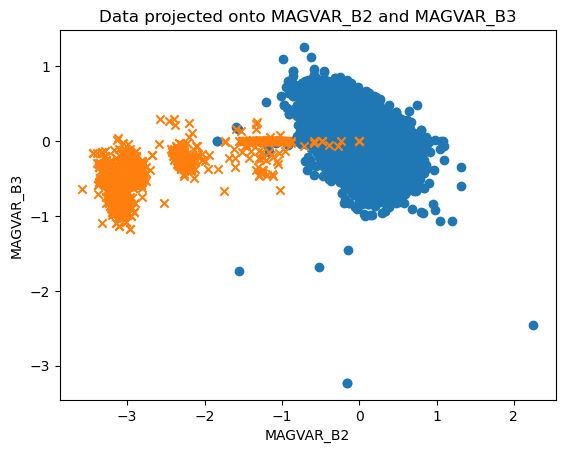

In [14]:
plot_features(df, 'MAGVAR_B2', 'MAGVAR_B3', 'IS_GRB')

/Users/jeremypalmerio/opt/miniconda3/envs/VTAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremypalmerio/opt/miniconda3/envs/VTAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MAGVAR_B1', ylabel='MAGVAR_B2'>

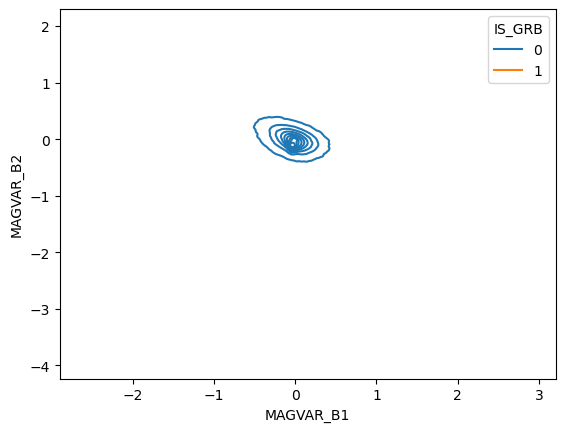

In [15]:
import seaborn as sns

sns.kdeplot(data=df, x="MAGVAR_B1", y="MAGVAR_B2", hue="IS_GRB")

In [7]:
cols = ['MAGCAL_R3', 'MAGCAL_B0', 'MAGCAL_B1', 'MAGCAL_B2', 'MAGCAL_B3',
       'MAGERR_R0', 'MAGERR_R1', 'MAGERR_R2', 'MAGERR_R3', 'MAGERR_B0',
       'MAGERR_B1', 'MAGERR_B2', 'EFLAG_R2', 'EFLAG_B0', 'EFLAG_B1',]

list1 = ['EFLAG_R1', 'EFLAG_R2', 'EFLAG_R3', 'EFLAG_B0', 'EFLAG_B1', 'EFLAG_B2',
       'EFLAG_B3']

[x for x in cols if x in list1]

['EFLAG_R2', 'EFLAG_B0', 'EFLAG_B1']